<a href="https://colab.research.google.com/github/sainahah/titanic-classification/blob/main/Titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding the Data**

In [1]:
import pandas as pd

# Load the Titanic dataset
data = pd.read_csv("/content/Titanic-Dataset.csv")

# Display the first few rows of the dataset
print(data.head())

# Get information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

**Data Preprocessing and Cleaning**

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
data = pd.read_csv("/content/Titanic-Dataset.csv")

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])

# Convert categorical features to numerical format
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Perform one-hot encoding for 'Embarked' column
data = pd.get_dummies(data, columns=['Embarked'])

# Feature scaling
scaler = StandardScaler()
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the updated dataset
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age     SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.592481  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.638789  0.432793   
2                             Heikkinen, Miss. Laina    0 -0.284663 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.407926  0.432793   
4                           Allen, Mr. William Henry    1  0.407926 -0.474545   

      Parch            Ticket      Fare Cabin  Embarked_C  Embarked_Q  \
0 -0.473674         A/5 21171 -0.502445   NaN           0           0   
1 -0.473674          PC 17599  0.786845   C85           1           0   
2 -0.473674  STON/O2. 3101282 -0.488854   NaN           0           0   
3 -0

**Data Exploration and Visualization**

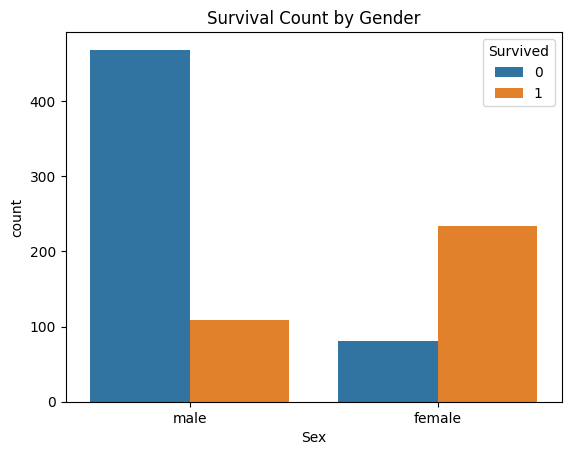

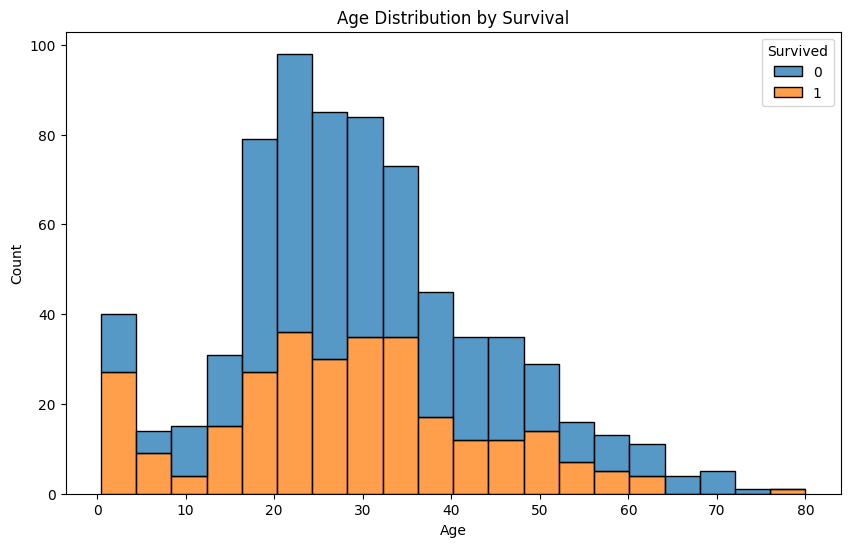

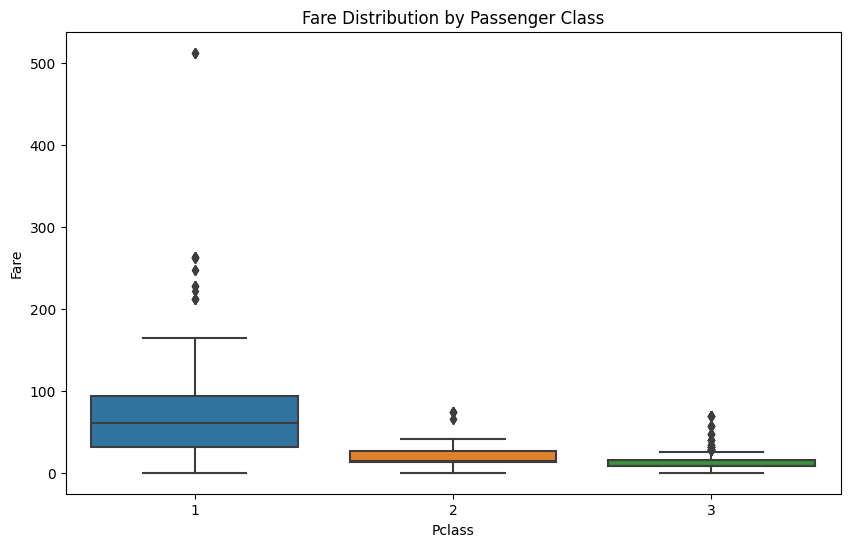

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
data = pd.read_csv("/content/Titanic-Dataset.csv")

# Explore data through visualizations

# Count plot of survival by gender
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title("Survival Count by Gender")
plt.show()

# Distribution of age by survival status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title("Age Distribution by Survival")
plt.show()

# Box plot of class vs. fare
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title("Fare Distribution by Passenger Class")
plt.show()


**Feature Selection and Engineering**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Titanic dataset
data = pd.read_csv("/content/Titanic-Dataset.csv")

# Select relevant features
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Create new feature 'FamilySize' by combining 'SibSp' and 'Parch'
data['FamilySize'] = data['SibSp'] + data['Parch']

# Prepare data for modeling
X = data[selected_features]
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the updated dataset
print(X_train.head())


     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
331       1    male  45.5      0      0  28.5000        S
733       2    male  23.0      0      0  13.0000        S
382       3    male  32.0      0      0   7.9250        S
704       3    male  26.0      1      0   7.8542        S
813       3  female   6.0      4      2  31.2750        S


**Model Selection**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the Titanic dataset
data = pd.read_csv("/content/Titanic-Dataset.csv")

# Select relevant features
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Prepare data for modeling
X = data[selected_features]
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Sex', 'Embarked']
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Train the model on the training data
model.fit(X_train, y_train)

# Predict survival on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7932960893854749


In [10]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.4 MB/s eta 0:00:00


Accuracy: 0.8268156424581006


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


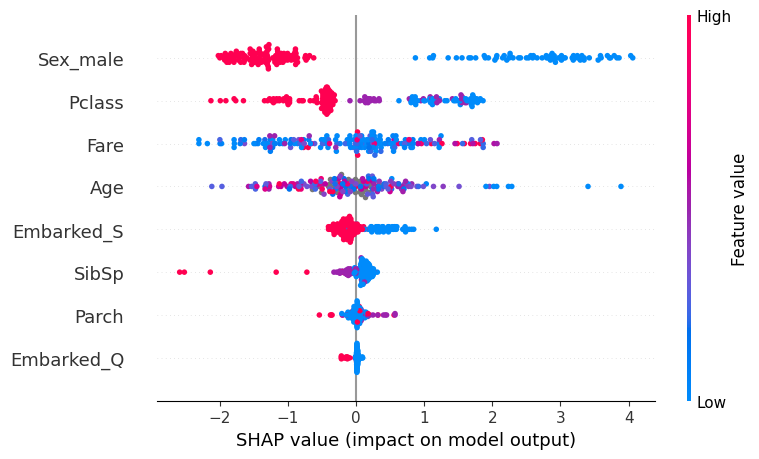

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
import shap

# Load the Titanic dataset
data = pd.read_csv("/content/Titanic-Dataset.csv")

# Select relevant features
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Prepare data for modeling
X = data[selected_features]
y = data['Survived']

# Convert categorical variables using pandas' get_dummies
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = HistGradientBoostingClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict survival on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Explain model predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Display SHAP summary plot
shap.summary_plot(shap_values, X_test)


